# COGS 108 - Final Project 

# Overview

One of the most important features in urban planning is park. The number of parks and the quality of parks are standards to examinate weather a city is livable or not. Parks are beneficial to both the enviorment and residents living around the area. Parks are places contributes to the health of all ages where residents go get healthy and relax; especially under the current COVID-19 pandemic, residents need an opened area to reduce stress. These all together make park planning an important study; in this project, I use datasets from Yelp and City of San Diego to find out whether the location(close to downtown or not) are important factors when people choosing a park to go base on the Yelp review in San Diego. The result is parks in downtown tend to have higher review counts, which means more people visiting, than non-downtown parks but the location will not determine the review scores

# Name & GitHub ID

- Name: Yuefeng Huang
- GitHub Username: alexyuefeng

# Research Question

Does the the location (in downtown or not) have a positive relation with the yelp review score in San Diego? Should we put more parks in downtown San Diego for future build?

## Background and Prior Work

The first link contains a prior work done for urban planning, it suggests a total of 1,500 acres of parks/recreation area should be used for 100,000 people/12,000 acres of area to use(minimun area necessary). 'This meant that a city of 12,000 acres should have 1,500 acres of parks.' By doing simple calculation, an residential area should at least reserve 12.5% of its area to be used as parks.

The second link contains a study shown the relation between some core features of a park and its popularity among a neighborhood. 'Parks that were used for physical activity had a mean area of 22.34 hectares, a mean of 12.43 features, and were, on average, 955 m from participants’ homes.' This study shows that people prefer going to the larger park that are close to their houses. 

The third link contains a public fast facts about the total park land(developed and undeveloped) in San Diego is 42263 acres, it introduces the current biggest regional parks and their sizes. There is still undeveloped area that are reserved only for parks use.

References (include links):
- 1)https://www.planning.org/pas/reports/report194.htm
- 2)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2446450
- 3)https://www.sandiego.gov/sites/default/files/fastfacts.pdf

# Hypothesis


A park has higher yelp reviews and review score when it is in the downtown of San Diego. Since downtown tends to have larger populations, number of review for each park in downtown should be larger than those are not in downtown; downtown is relatively more advanced than non downtown area so parks in downtown should have higher review scores.

# Dataset(s)

1.
- Dataset Name: yelp_SD_parks.csv
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv
- Number of observations: 833
- Description: This dataset include yelp review scores for each park in San Diego which I will be using during the analysis. It also has the address for each park, I will be using the zip code for each park to identify if it's in downtown San Diego (zip code : 92101) or not.

2.
- Dataset Name: parks_datasd.geojson
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/parks_datasd.geojson
- Number of observations: 2769
- Description: This dataset is a geojson file which contains the geography information for each park around the San Diego area, it also includes the arce size for each park which I will be using in my analysis.

I am planning to read both of the datas, select the information I need to both dataset. For yelp_SD_parks.csv, I will be selecting ['name', 'address', 'rating', 'review_count'], and slice them to two datasets, one indside downtown(92101) and one not inside downtown. For parks_datasd.geojson, I will be selecting ['name', 'gis_acres', 'geometry']. Finally, I will try to merge these two datasets by their names and show the rating on a map.

# Setup

In [193]:
# Imports 
%matplotlib inline

import geopandas as gpd
from geopandas import GeoDataFrame
from pandas.plotting import scatter_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("yelp_SD_parks.csv")
df_geo = gpd.read_file("parks_datasd.geojson")

# Data Cleaning

Describe your data cleaning steps here.

In [202]:
#selecting data I need, merge two datasets based on same name(loss of data)
df = df[['name', 'address', 'rating', 'review_count']]
df_geo = df_geo[['name', 'gis_acres', 'geometry']]
result = pd.merge(df, df_geo, on = 'name')
df['address'] = df['address'].astype(str).str[-5:]
result = result[result['geometry'].astype(str).str[:7] == 'POLYGON'] # df_geo contains same parks with  multiplepolygon is not considered
print(result.head())
print(result.shape)
print('# of na rows=', len(df[df.isna().any(axis=1)])) # there is no na rows

                         name address  rating  review_count   gis_acres  \
0             Waterfront Park   92101     4.5           242   12.693865   
1               Heritage Park   92110     4.5            34   10.732903   
3     4S Ranch Community Park   92127     5.0            17    3.241830   
4          Harbor Island Park   92101     4.5            71    2.994218   
5  Cabrillo National Monument   92106     4.5           681  153.276913   

                                            geometry  
0  POLYGON ((-117.17156 32.72450, -117.17280 32.7...  
1  POLYGON ((-116.99582 32.62474, -116.99597 32.6...  
3  POLYGON ((-117.11610 33.00321, -117.11583 33.0...  
4  POLYGON ((-117.20547 32.72525, -117.20549 32.7...  
5  POLYGON ((-117.24162 32.67722, -117.24163 32.6...  
(41, 6)
# of na rows= 0


# Data Analysis & Results


Include cells that describe the steps in your data analysis.

In [195]:
#sample downtown area parks vs. non-downtown area parks
dt = df[df['address'] == '92101']
print(dt.head())
notdt = df[df['address']!='92101']
print(notdt.head())

                  name address  rating  review_count
0          Balboa Park   92101     5.0          2105
2      Waterfront Park   92101     4.5           242
14        Pioneer Park   92101     4.0            55
43  Harbor Island Park   92101     4.5            71
44    Golden Hill Park   92101     4.0            35
                name address  rating  review_count
1        Civita Park   92108     4.5            46
3  Trolley Barn Park   92116     4.5           102
4      Bay View Park   92118     5.0            42
5       Centrum Park   92123     3.5            22
6      Presidio Park   92110     4.5            85


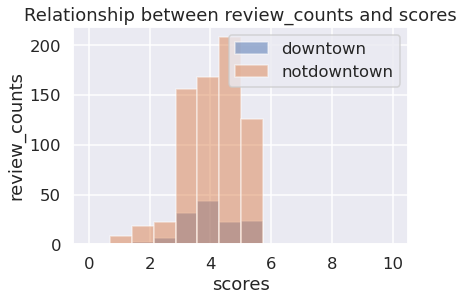

In [230]:
#graph Yelp rating between parks in downtown and parks outside of downtown
bins = np.linspace(0, 10, 15)
plt.xlabel("scores")
plt.ylabel("review_counts")
plt.title('Relationship between review_counts and scores')
plt.hist(dt['rating'], bins,  alpha=0.5, label='downtown')
plt.hist(notdt['rating'], bins, alpha=0.5, label='notdowntown')
plt.legend(loc='upper right')
plt.show()

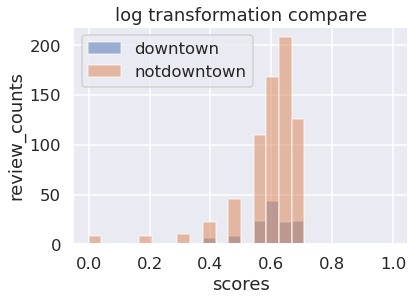

In [229]:
#log transformation compare
dt['rating_log'] = dt['rating']
notdt['rating_log'] = notdt['rating']
dt['rating_log'] = np.log10(dt['rating_log'])
notdt['rating_log'] = np.log10(notdt['rating_log'])

bins = np.linspace(0, 1, 25)
plt.xlabel("scores")
plt.ylabel("review_counts")
plt.title('log transformation compare')
plt.hist(dt['rating_log'], bins,  alpha=0.5, label='downtown')
plt.hist(notdt['rating_log'], bins, alpha=0.5, label='notdowntown')
plt.legend(loc='upper left')
plt.show()


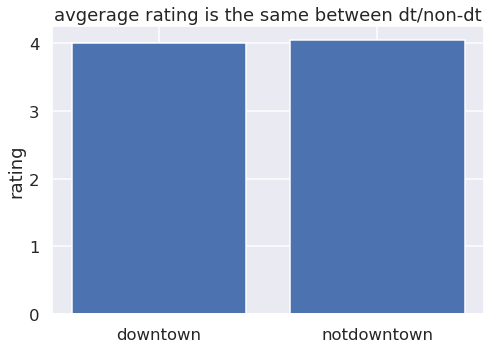

In [216]:
# rating compare between downtown and non-downtown
dt_rmean = dt['rating'].mean()
notdt_rmean = notdt['rating'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['downtown', 'notdowntown']
y = [dt_rmean, notdt_rmean]
ax.bar(x,y)
plt.ylabel('rating')
plt.title('avgerage rating is the same between dt/non-dt')
plt.show()

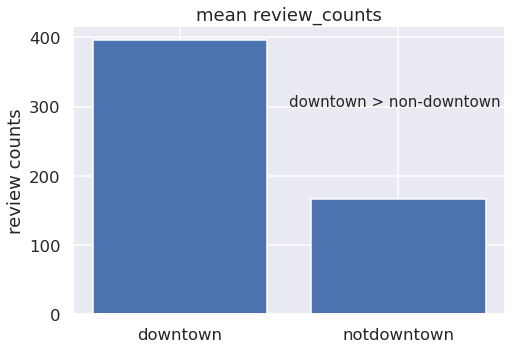

In [218]:
# mean number of reviews between downtown and non-downtown
dt_mean = dt['review_count'].mean()
notdt_mean = notdt['review_count'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['downtown', 'notdowntown']
y = [dt_mean, notdt_mean]
ax.bar(x,y)
plt.ylabel('review counts')
plt.title('mean review_counts')
ax.text(0.5, 300, r'downtown > non-downtown', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Relationship between park size and yelp rating')

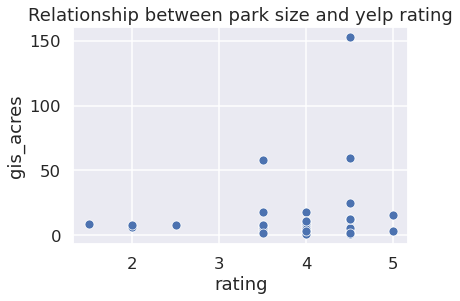

In [227]:
ax = sns.scatterplot(x='rating', y='gis_acres', data=result)
ax.set_title('Relationship between park size and yelp rating')

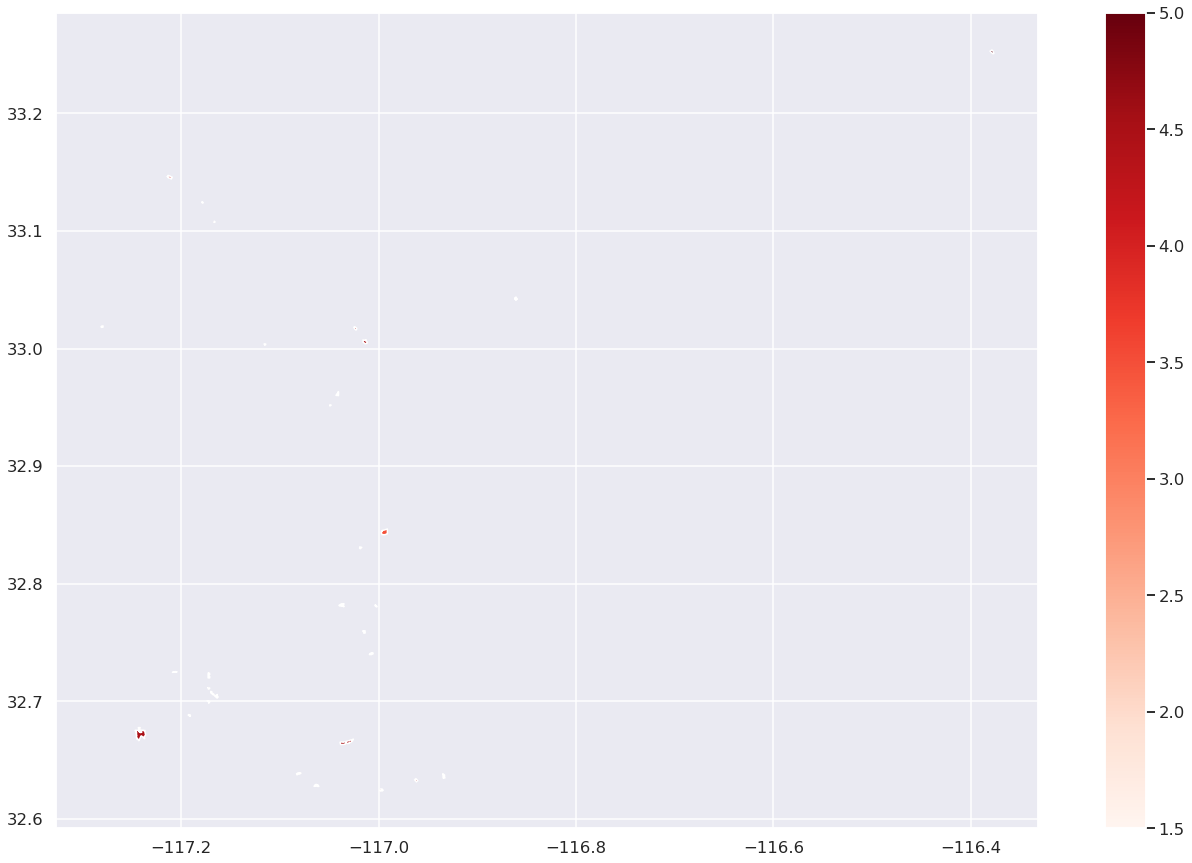

In [232]:
#!conda install -c conda-forge descartes
#geospatial graph based on rating, the area with the deepest red color is City of San Diego
result = GeoDataFrame(result)
result.plot(column='rating', figsize=(24,15), cmap = 'Reds', legend = True)

# Ethics & Privacy

The datasets used in this project are collected publicly from local government or companies and can be accessed and used freely for anyone. The dataset will not contain personal information such as names, address or personal phone numbers. All personal information will be removed prior to analysis. The datasets used in this project have been double-checked to leave out any personal information. This analysis will not use any personal/private information since it's not looking at specific people, instead, it obeserves the overall rating score collected from Yelp and other public recorded data like information of a park. This analysis based on the dataset will be used to generate an result analysing future parks that will be built at San Diego. Using any personal information is not the goal of this project. The goal of this project is to contribute to urban planning in the city of San Diego.

# Conclusion & Discussion

Based on my analysis above using data from Yelp and City of San Diego, my hypothesis is half correct such that the location (in downtown or not) of a park in San Diego do not have a huge impact on parks rating while review_count for parks in downtown area is higher than those are not in downtown.

One limitation in my project is that when I try to combine two datasets just using their name, I notice that lots of data are lost because they don't have the exact same names. The first dataset contains 833 observations and the second contains 2769 while the combined datset only has 41 observations left.

The impact is when city of San Diego is doing urban planning, it should reserve more area in downtown for parks since downtown has higher population desity. Residents need parks to go realx and get healthy, small amounts of park will not satisfy the demands.